# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer


state = np.random.RandomState(12345)

In [35]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

**Обучающая выборка**

In [36]:
display(train.head())
print()
train.info()
display(train.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


**Тестовая выборка**

In [37]:
display(test.head())
print()
test.info()
display(test.describe())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_cle

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


**Исходные данные**

In [38]:
display(full.head())
print()
full.info()
display(full.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [39]:
#проверка на дубликаты
print(train.duplicated().sum())
print(test.duplicated().sum())
print(full.duplicated().sum())

0
0
0


Каждый из датасетов имеет разный размер: обучающая выборка (14149, 87), тестовая выборка (5290, 53), исходные данные (19439, 87). 

В данных присутствуют пропуски, полных дубликатов нет.

### Проверка расчета
Проверим, правильно ли рассчитана эффективность обогащения. Вычислим её на обучающей выборке для признака rougher.output.recovery и найдем MAE между расчётами и значением признака.

In [40]:
def recovery(C, F, T, true_rec):
    
    recovery_calc = pd.Series((C * (F - T)) / (F * (C - T)) * 100)
    
    print('Расчет:', recovery_calc.mean())
    print('Значение признака:', true_rec.mean())
    
    mae = mean_absolute_error(true_rec, recovery_calc) 
    
    
    return print('MAE:', mae)

In [41]:
recovery(C=train['rougher.output.concentrate_au'], F=train['rougher.input.feed_au'], 
         T=train['rougher.output.tail_au'], true_rec=train['rougher.output.recovery'])

Расчет: 82.70450164550293
Значение признака: 82.70450164550293
MAE: 9.73512347450521e-15


Значения совпадают, средняя абсолютная ошибка небольшая, значит эффективность рассчитана правильно. 

### Анализ признаков
Проанализируем признаки, недоступные в тестовой выборке. Посмотрим, что это за параметры и к какому типу они относятся.

In [42]:
train.columns.symmetric_difference(test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовой выборке отсутствуют столбцы с параметрами продукта на выходе разных этапов обработки и расчетные харктеристики.

### Предобработка данных
**Удаление и добавление столбцов**

Добавим в тестовую выборку столбцы с целевыми признаками - rougher.output.recovery и final.output.recovery. Затем удалим столбец с датой, тк для обучения модели он не понадобится. Так же из обучающей выборки удалим признаки, которых нет в тестовой, тк для обучения модели они недоступны. 

In [43]:
test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                            how='left', left_on='date', right_on='date')
test.drop(['date'], axis=1, inplace=True)
test.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432


In [44]:
train.drop(train.columns.symmetric_difference(test.columns), axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       14149 non-null  float64
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 10  primary_cl

**Заполнение пропусков**

Поскольку данные индексируются датой и временем получения информации и соседние по времени параметры часто похожи, заполним пропуски методом ffil.

In [45]:
datasets = [train, test, full]
for dataset in datasets:
    dataset.ffill(inplace=True)
    print(dataset.isna().sum().sum())

0
0
0


## Анализ данных
### Концентрация металлов 
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [46]:
df_au = (full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].copy())

df_ag = (full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].copy())

df_pb = (full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].copy())

In [47]:
def metals (data, title):
    fig, ax = plt.subplots()
    ax.set_ylabel('Кол-во значений')
    ax.set_xlabel('Концентрация металла, %')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.3) 
        ax.legend(['До очистки','Флотация','Первичная очистка', 'Вторичная очистка'])

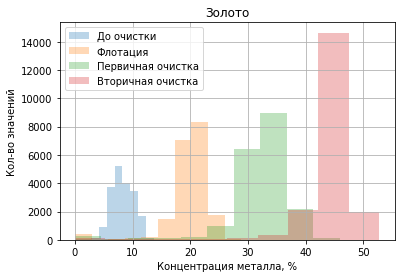

In [48]:
metals(df_au, 'Золото')

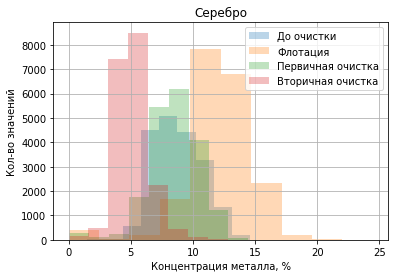

In [49]:
metals(df_ag, 'Серебро')

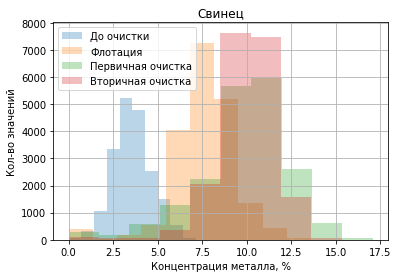

In [50]:
metals(df_pb, 'Свинец')

Из всех металлов наибольшая концентрация у золота - с каждом этапом очистки она повышается.

Концентрация серебра повышается при флотации, но после очисток сильно снижается.

Концентрация свинца повышается при флотации и первой очистке, вторая очистка на значения не влияет.

### Распределение размеров гранул сырья
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

In [51]:
#from scipy.stats import ks_2samp
#print(ks_2samp(train['rougher.input.feed_size'], test['rougher.input.feed_size']))
#ks_2samp(train['primary_cleaner.input.feed_size'], test['primary_cleaner.input.feed_size'])

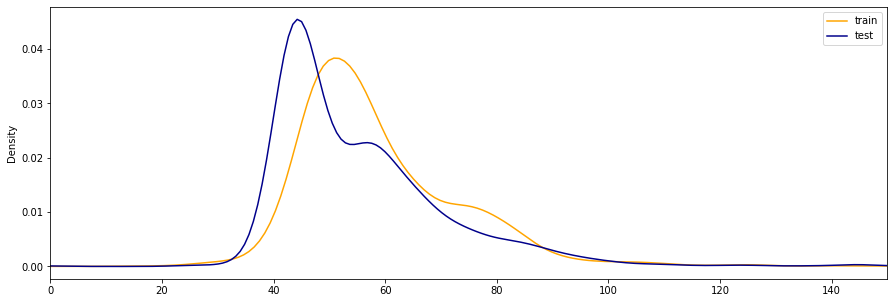

In [52]:
plt.figure(figsize=(15, 5))
ax = train['rougher.input.feed_size'].plot.kde(color='orange', label='train')
ax = test['rougher.input.feed_size'].plot.kde(color='darkblue', label='test')
plt.legend()
plt.xlim(0, 150);

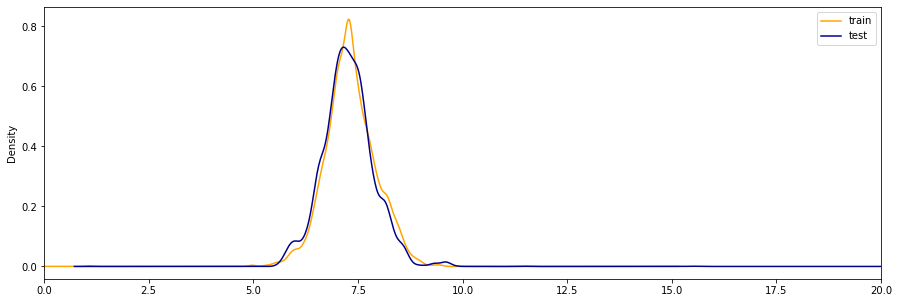

In [53]:
plt.figure(figsize=(15, 5))
ax = train['primary_cleaner.input.feed_size'].plot.kde(color='orange', label='train')
ax = test['primary_cleaner.input.feed_size'].plot.kde(color='darkblue', label='test')
plt.legend()
plt.xlim(0, 20);

На этапе флотации распределения гранул сырья немного отличаются, на обучающей выборке значения больше смещены вправо. На этапе первичной обработки распределения примерно идентичны.

### Суммарная концентрация веществ
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [54]:
feed = full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)

conc = full[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
             'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)

final = full[['final.output.concentrate_pb', 'final.output.concentrate_ag', 
             'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

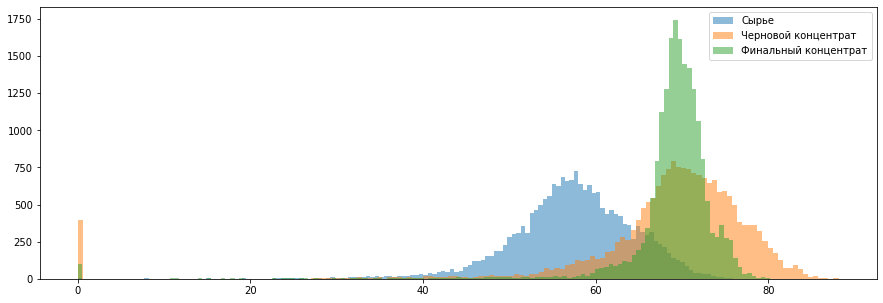

In [55]:
plt.figure(figsize=(15, 5))
plt.hist(feed, bins=150, alpha=0.5, label='Сырье')
plt.hist(conc, bins=150, alpha=0.5, label='Черновой концентрат')
plt.hist(final, bins=150, alpha=0.5, label='Финальный концентрат')
plt.legend()
plt.show();

In [56]:
print('Аномалии в сырье:', (feed==0).sum())

Аномалии в сырье: 0


Видим аномалии в районе нуля, большая часть их приходится на черновой концетрат, в сырье их нет. Причины могут быть разные - не проводились измерения, сбой оборудования и тд. В обучающей выборке столбцы с аномалиями уже удалены, а в тестовой их нет. В исходных данных удалять эти значения не будем, тк для построения модели они не нужны и на ее качество, соответственно, не повлияют.

## Модель
### sMape
Напишем функцию для расчета метрики качества модели sMAPE и для вычисления итоговой sMAPE.

In [57]:
def smape(target, pred):
    return 1/len(target) * np.sum(2 * np.abs(pred - target) / (np.abs(target) + np.abs(pred)))

In [58]:
def smape_final(rougher, final):
    return 0.25 * rougher + 0.75 * final

smape_score = make_scorer(smape, greater_is_better=False)

### Обучение и проверка модели
Разделим обучающую и тестовую выборки на признаки и целевые признаки.

In [59]:
features_r = []
for column in train.columns:
    if "rougher" in column:
        features_r.append(column)
features_train_r = train[features_r] 
features_test_r = test[features_r]
target_train_r = train['rougher.output.recovery']
target_test_r = test['rougher.output.recovery']

features_train_f = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test_f = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = train['final.output.recovery']
target_test_f = test['final.output.recovery']

Стандартизируем данные.

In [60]:
pd.options.mode.chained_assignment = None
scaler_r = StandardScaler()
scaler_r.fit(features_train_r)

features_train = scaler_r.transform(features_train_r)
features_test = scaler_r.transform(features_test_r)

scaler_f = StandardScaler()
scaler_f.fit(features_train_f)

features_train = scaler_f.transform(features_train_f)
features_test = scaler_f.transform(features_test_f)

**Линейная регрессия**

In [61]:
smape_r = -cross_val_score(LinearRegression(), features_train_r, target_train_r, cv=5, scoring=smape_score)
smape_f = -cross_val_score(LinearRegression(), features_train_f, target_train_r, cv=5, scoring=smape_score)
final = smape_final(smape_r, smape_f)

print('sMAPE после флотации: {:.2%}.'.format(smape_r.mean(), smape_r))
print('sMAPE после финальной обработки: {:.2%}.'.format(smape_f.mean(), smape_f))
print('Общий sMAPE: {:.2%}.'.format(final.mean(),final))

sMAPE после флотации: 4.20%.
sMAPE после финальной обработки: 12.80%.
Общий sMAPE: 10.65%.


**Дерево решений**

In [62]:
%%time
params_tree = {'max_depth': range(1,11)}

tree_r = GridSearchCV(DecisionTreeRegressor(random_state=state), 
                     param_grid=params_tree, scoring=smape_score, cv=5, n_jobs=-1)
tree_r.fit(features_train_r, target_train_r)

tree_f = GridSearchCV(DecisionTreeRegressor(random_state=state), 
                     param_grid=params_tree, scoring=smape_score, cv=5, n_jobs=-1)
tree_f.fit(features_train_f, target_train_r)

print('sMAPE после флотации: {:.2%}. Параметры {}'.format(-tree_r.best_score_, tree_r.best_params_))
print('sMAPE после финальной обработки: {:.2%}. Параметры {}'.format(-tree_f.best_score_, tree_f.best_params_))
print('Общий sMAPE: {:.2%}\n'.format(-smape_final(tree_r.best_score_ , tree_f.best_score_)))

sMAPE после флотации: 0.08%. Параметры {'max_depth': 10}
sMAPE после финальной обработки: 11.58%. Параметры {'max_depth': 4}
Общий sMAPE: 8.70%

CPU times: user 23.6 s, sys: 36 ms, total: 23.6 s
Wall time: 23.7 s


**Случайный лес**

In [63]:
%%time
params_forest = {'n_estimators': range(1,10), 'max_depth': range(1,11)} 
#пробовала увеличить кол-во деревьев, но тогда слишком долго подбираютмся параметры
forest_r = GridSearchCV(RandomForestRegressor(random_state=state), 
                     param_grid=params_forest, scoring=smape_score, cv=5, n_jobs=-1)
forest_r.fit(features_train_r, target_train_r)

forest_f = GridSearchCV(RandomForestRegressor(random_state=state), 
                     param_grid=params_forest, scoring=smape_score, cv=5, n_jobs=-1)
forest_f.fit(features_train_f, target_train_f)

print('sMAPE после флотации: {:.2%}. Параметры {}'.format(-forest_r.best_score_, forest_r.best_params_))
print('sMAPE после финальной обработки: {:.2%}. Параметры {}'.format(-forest_f.best_score_, forest_f.best_params_))
print('Общий sMAPE: {:.2%}\n'.format(-smape_final(forest_r.best_score_ , forest_f.best_score_)))

sMAPE после флотации: 0.09%. Параметры {'max_depth': 10, 'n_estimators': 1}
sMAPE после финальной обработки: 10.08%. Параметры {'max_depth': 5, 'n_estimators': 6}
Общий sMAPE: 7.59%

CPU times: user 10min 20s, sys: 1.74 s, total: 10min 22s
Wall time: 10min 23s


**Проверка лучшей модели**

In [66]:
model_r = RandomForestRegressor(random_state=state, n_estimators=1, max_depth=10) 
model_f = RandomForestRegressor(random_state=state, n_estimators=6, max_depth=5) 

model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)

pred_r = model_r.predict(features_test_r)
pred_f = model_f.predict(features_test_f)

smape_r = smape(target_test_r, pred_r)
smape_f = smape(target_test_f, pred_f)
print('Общий sMAPE : {:.2%}'.format(smape_final(smape_r, smape_f)))

Общий sMAPE : 7.18%


**Проверка на адекватность**

In [65]:
dummy_r = DummyRegressor(strategy='mean')
dummy_f = DummyRegressor(strategy='mean')

dummy_r.fit(features_train_r, target_train_r)
dummy_f.fit(features_train_f, target_train_f)

dummy_pred_r = dummy_r.predict(features_test_r)
dummy_pred_f = dummy_f.predict(features_test_f)

smape_r = smape(target_test_r, dummy_pred_r)
smape_f = smape(target_test_f, dummy_pred_f)
print('Общий sMAPE : {:.2%}'.format(smape_final(smape_r, smape_f)))

Общий sMAPE : 10.29%


## Вывод

При подборе модели для предсказания коэффициента восстановления золота из золотосодержащей руды были изучены данные с параметрами добычи и очистки и построены модели линейной регрессии, дерева решений и случайного леса, оптимальные гиперпараметры для которых определены методом GridSearchCV.

Наилучший результат показала модель случайного леса с sMAPE = 7,59% и следующими гиперпараметрами для этапа флотации и финальной обработки:

- max_depth = 10 и 3 соответственно;
- n_estimators = 3 и 7 соответственно.

При проверке модели случайного леса на тестовой выборке метрика улучшилась до 7,18% , а при сравнении с простейшей моделью DummyClassifier оказалась на 3,11% ниже.